In [3]:
from zipfile import ZipFile
import os

zip_file_path = r"C:\Projects\Fashion_recomendation\women-fashion.zip"
extraction_directory = r"C:\Projects\Fashion_recomendation\women_fashion"

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [4]:
import os
import pandas as pd

# Define the directory path
directory_path = r"C:\Projects\Fashion_recomendation\women_fashion\women fashion"

# List all files in the directory
file_list = os.listdir(directory_path)

# Filter out non-image files if necessary
# Assuming image files are of specific formats (jpg, png, etc.)
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

image_files = [file for file in file_list if file.lower().endswith(image_extensions)]

# Create lists for the DataFrame
image_names_with_format = image_files
image_names_without_format = [os.path.splitext(file)[0] for file in image_files]

# Create the DataFrame
df = pd.DataFrame({
    'Image Name': image_names_with_format,
    'Prompt': image_names_without_format
})

# Display the DataFrame
print(df[:60])


                                           Image Name  \
0   anarkali suit with a long, olive green kurta a...   
1               Anarkali suit with a modern twist.jpg   
2   Anarkali suit with fitted bodice with a high n...   
3   anarkali suit with intricate silver embellishm...   
4   anarkali suit with lavender in color with intr...   
5   anarkali suit. It consists of a turquoise skir...   
6   ark green, knee-length dress with short sleeve...   
7   beige top adorned with black dots and a green ...   
8   black and white gingham checkered A-line dress...   
9   black double-breasted blazer with gold buttons...   
10                black dress with lace detailing.jpg   
11             black dress with sparkling details.jpg   
12                             black floral saree.jpg   
13  black jumpsuit with a diagonal stripe of glitt...   
14  black lace bustier top paired with high-waiste...   
15             black off-shoulder dress with belt.jpg   
16  black top with spaghetti st

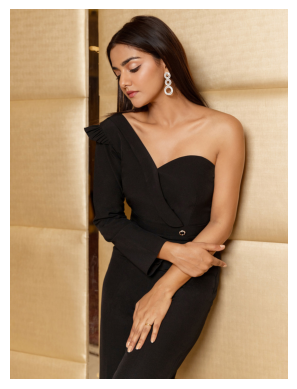

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[78])
display_image(first_image_path)

In [6]:
output_csv_path = r"C:\Projects\Fashion_recomendation\women_fashion\women_fashion_image_names.csv"
df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved as CSV at: {output_csv_path}")

DataFrame saved as CSV at: C:\Projects\Fashion_recomendation\women_fashion\women_fashion_image_names.csv


In [7]:
from langchain_community.llms import Ollama
llm = Ollama(model="llama3")

In [8]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image


def display_images(image_paths):
    for image_path in image_paths:
        img = Image.open(image_path)
        img.show()

base_path = r'C:\Projects\Fashion_recomendation\women_fashion'
csv_path = os.path.join(base_path, 'women_fashion_image_names.csv')
df = pd.read_csv(csv_path)

image_directory = base_path
image_dict = {row['Image Name']: os.path.join(image_directory, row['Image Name']) for _, row in df.iterrows()}

# Fit a TF-IDF Vectorizer on the prompts
vectorizer = TfidfVectorizer().fit(df['Prompt'])
prompt_vectors = vectorizer.transform(df['Prompt'])

# Function to match user prompt
def match_prompt(user_prompt, df, vectorizer, prompt_vectors):
    user_prompt_vector = vectorizer.transform([user_prompt])
    similarities = cosine_similarity(user_prompt_vector, prompt_vectors)
    match_indices = similarities.argsort()[0][-3:][::-1]  # Get top 3 matches
    return df.iloc[match_indices]


In [11]:
user_prompt = "floral summer dress"
matched_rows = match_prompt(user_prompt, df, vectorizer, prompt_vectors)

In [12]:
matched_rows

,Image Name,Prompt
38,floral dress with long sleeves.jpeg,floral dress with long sleeves
19,blue dress with a floral pattern.jpg,blue dress with a floral pattern
12,black floral saree.jpg,black floral saree


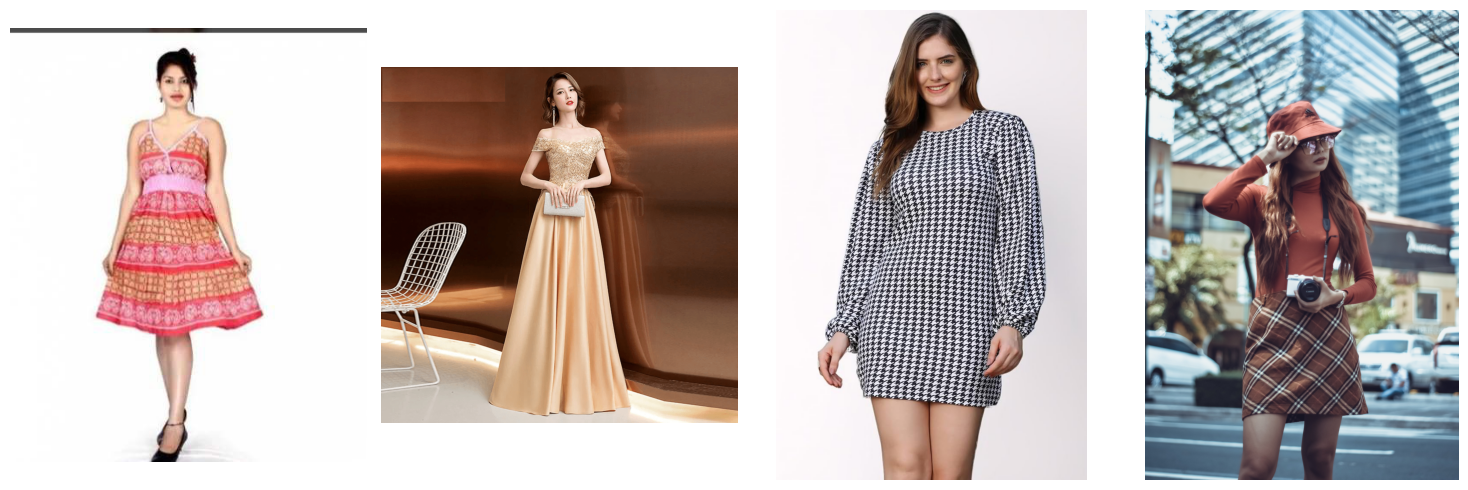

In [13]:
import os
import pandas as pd
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from langchain_community.llms import Ollama
import matplotlib.pyplot as plt

# Define paths
base_path = 'C:\Projects\Fashion_recomendation\women_fashion\women fashion'
csv_path = 'C:\Projects\Fashion_recomendation\women_fashion\women_fashion_image_names.csv'

# Read the CSV file
df = pd.read_csv(csv_path)

# Create a dictionary to hold image paths
image_dict = {row['Image Name']: os.path.join(base_path, row['Image Name']) for _, row in df.iterrows()}

# Function to display images
def display_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for ax, image_path in zip(axes, image_paths):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Load the Ollama model
llm = Ollama(model="llama3")

# Fit a TF-IDF Vectorizer on the prompts
vectorizer = TfidfVectorizer().fit(df['Prompt'])
prompt_vectors = vectorizer.transform(df['Prompt'])

# Function to match user prompt
def match_prompt(user_prompt, df, vectorizer, prompt_vectors, num_images=3):
    user_prompt_vector = vectorizer.transform([user_prompt])
    similarities = cosine_similarity(user_prompt_vector, prompt_vectors)
    match_indices = similarities.argsort()[0][-num_images:][::-1]  # Get top 'num_images' matches
    return df.iloc[match_indices]

# Example prompt matching
user_prompt = input("Enter a fashion prompt: ")
num_images = int(input("Enter the number of images to display: "))
matched_rows = match_prompt(user_prompt, df, vectorizer, prompt_vectors, num_images)

# Display matched images
matched_image_paths = [image_dict[row['Image Name']] for _, row in matched_rows.iterrows()]
display_images(matched_image_paths)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2836\2519774032.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_rows['Similarity'] = similarities[0, match_indices]  # Add similarity scores to the DataFrame


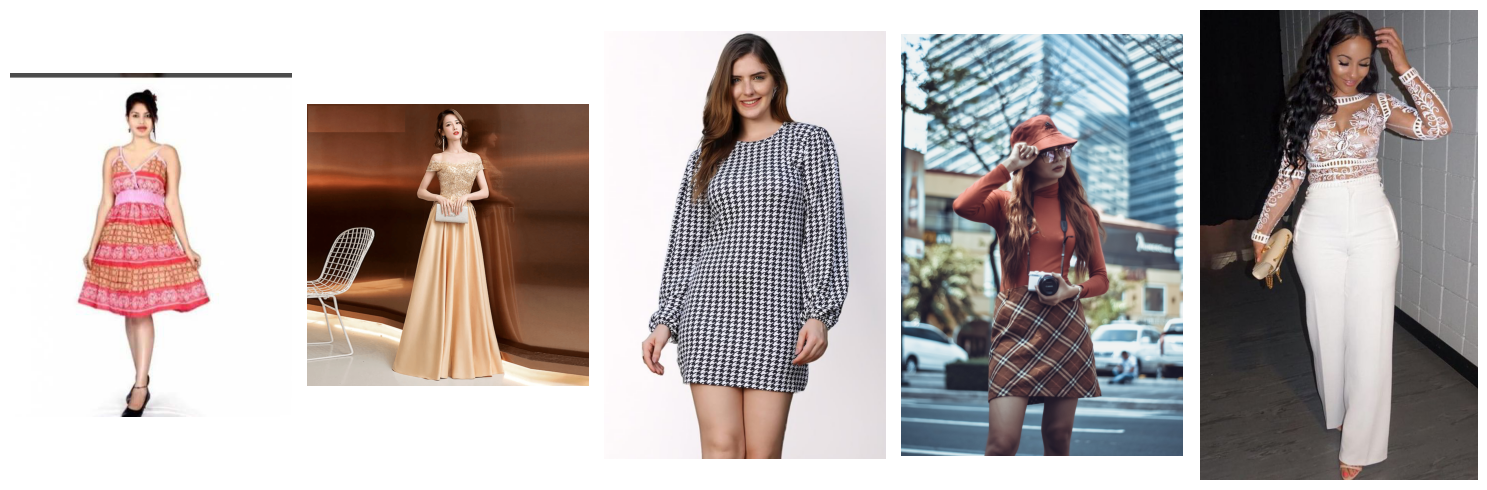

In [14]:
import os
import pandas as pd
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from langchain_community.llms import Ollama
import matplotlib.pyplot as plt

# Define paths
base_path = 'C:\Projects\Fashion_recomendation\women_fashion\women fashion'
csv_path = 'C:\Projects\Fashion_recomendation\women_fashion\women_fashion_image_names.csv'

# Read the CSV file
df = pd.read_csv(csv_path)

# Create a dictionary to hold image paths
image_dict = {row['Image Name']: os.path.join(base_path, row['Image Name']) for _, row in df.iterrows()}

# Function to display images
def display_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for ax, image_path in zip(axes, image_paths):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Load the Ollama model
llm = Ollama(model="llama3")

# Fit a TF-IDF Vectorizer on the prompts
vectorizer = TfidfVectorizer().fit(df['Prompt'])
prompt_vectors = vectorizer.transform(df['Prompt'])

# Function to match user prompt
def match_prompt(user_prompt, df, vectorizer, prompt_vectors, num_images=3):
    user_prompt_vector = vectorizer.transform([user_prompt])
    similarities = cosine_similarity(user_prompt_vector, prompt_vectors)
    match_indices = similarities.argsort()[0][-num_images:][::-1]  # Get top 'num_images' matches
    matched_rows = df.iloc[match_indices]
    matched_rows['Similarity'] = similarities[0, match_indices]  # Add similarity scores to the DataFrame
    matched_rows = matched_rows.sort_values(by='Similarity', ascending=False)  # Sort by similarity
    return matched_rows

# Example prompt matching
user_prompt = input("Enter a fashion prompt: ")
num_images = int(input("Enter the number of images to display: "))
matched_rows = match_prompt(user_prompt, df, vectorizer, prompt_vectors, num_images)

# Display matched images
matched_image_paths = [image_dict[row['Image Name']] for _, row in matched_rows.iterrows()]
display_images(matched_image_paths)


In [15]:
import streamlit

In [2]:
from langchain_community.llms import Ollama

llm = Ollama(model="llama3")

image_name = "floral dress with long sleeves"
prompt = (
            f"Now you are a Fashion Expert. I will be giving the image short description of an outfit, provide a description of what occasion that outfit can be used, then what kind of shoes and watches to be used for that. The image description is '{image_name}' "
        )
        
        # Refine the query using LLM
refined_disp = llm.invoke(prompt)

ValueError: Ollama call failed with status code 500. Details: {"error":"llama runner process has terminated: exit status 0xc0000142 "}